# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('/Users/lixinjin/Downloads/MDST-Tutorial-main/Optional Challenges/Statistics Focus/orders.csv')

In [70]:
df_sorted = df.sort_values('created_at') 
# Here we get a basic knowledge about 'created_at', range from 2017-03-01 to 2017-03-30
df_sorted

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at,order_value_per_item
1862,1863,39,738,536,4,cash,2017-03-01 0:08:09,134.0
1741,1742,39,910,268,2,cash,2017-03-01 0:10:19,134.0
3228,3229,97,912,324,2,cash,2017-03-01 0:14:12,162.0
1267,1268,80,798,290,2,credit_card,2017-03-01 0:19:31,145.0
2689,2690,49,799,258,2,credit_card,2017-03-01 0:22:25,129.0
...,...,...,...,...,...,...,...,...
2765,2766,9,708,236,2,debit,2017-03-30 9:22:41,118.0
4890,4891,63,853,136,1,cash,2017-03-30 9:27:00,136.0
244,245,32,928,202,2,cash,2017-03-30 9:30:28,101.0
211,212,22,712,292,2,credit_card,2017-03-30 9:40:40,146.0


In [71]:
df['order_value'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_value, dtype: float64

In [72]:
df['created_at'].describe()

count                   5000
unique                  4991
top       2017-03-28 4:00:00
freq                       3
Name: created_at, dtype: object

### Question 1

In [30]:
df['order_value'].mean()

3145.128

The problem with AOV is they caculate the mean value of all 100 shops order_value column over 30 days. This will give $3145.13 value. 

### Question 2

In [42]:
# plt.hist(df['order_value'], color='blue', edgecolor='black', bins=100)

Based on the hist plot and dataframe describe() result, order_value column is highly skewed to right, because most of the transactions are a few hundred dollars; however, there are some transactions with very large amounts, such as the maximum $704,000. This skewness largely affects the mean value or order_value. Therefore, we prefer median order value to represent behavior of stores' customers. We can simply compute the median order value, and also compute median based on number of items. 

In [43]:
# Median for all transcation in March
df['order_value'].median()

284.0

<AxesSubplot:xlabel='total_items', ylabel='count'>

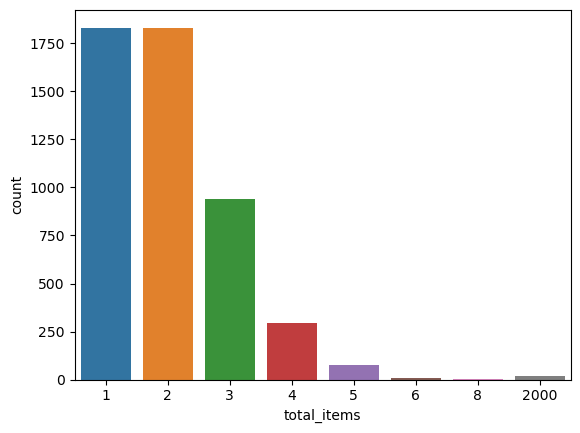

In [68]:
order_num = df.groupby(['total_items'])['order_id'].nunique().to_frame()
order_num = order_num.reset_index()
order_num = order_num.rename(columns = {'order_id':'count'})
order_num

sns.barplot(data = order_num, x='total_items', y='count')

In [45]:
df['order_value_per_item'] = df['order_value'] / df['total_items']
df['order_value_per_item'].median()

153.0

The median order value across all transactions is 284 dollars, which is based on every transaction. Furthermore, the median order value per item is 153 dollars, making it useful to know the value of each item in an order. A median value is not affected by outliers and is a reliable indicator of customer behavior.

### Question 3

In [129]:
df['created_at'] = pd.to_datetime(df['created_at'])  

df['created_date'] = df['created_at'].dt.date
df['created_time'] = df['created_at'].dt.time
df['hours'] = df['created_at'].dt.hour

(array([17226., 17230., 17234., 17238., 17242., 17246., 17250., 17254.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

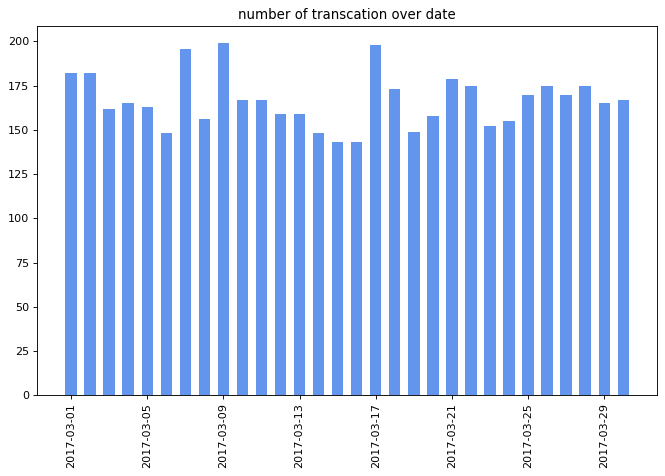

In [126]:
count_df = df.groupby('created_date').size().to_frame("count").reset_index()

plt.figure(figsize=(10, 6), dpi=80)
plt.bar(count_df['created_date'], count_df['count'], width = 0.6, color = 'cornflowerblue')
plt.title('number of transcation over date')
plt.xticks(rotation=90)

(array([17226., 17230., 17234., 17238., 17242., 17246., 17250., 17254.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

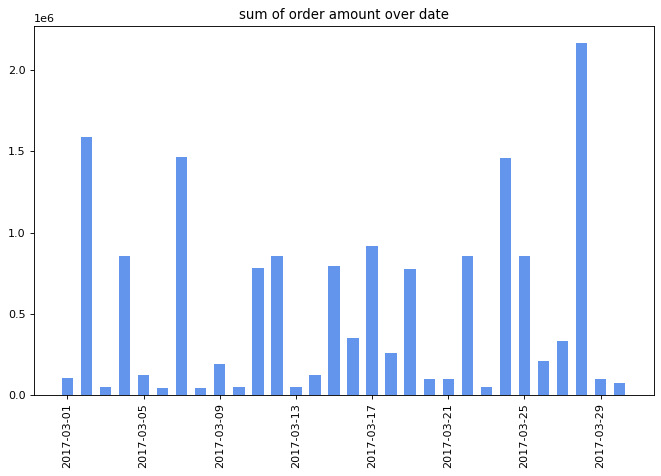

In [127]:
sum_df = df.groupby('created_date')['order_value'].sum().to_frame().reset_index()

plt.figure(figsize=(10, 6), dpi=80)
plt.bar(sum_df['created_date'], sum_df['order_value'], width = 0.6, color = 'cornflowerblue')
plt.title('sum of order amount over date')
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

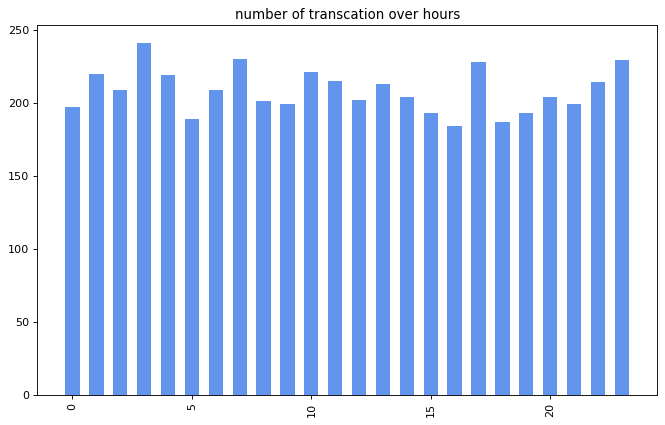

In [128]:
hr_df = df.groupby('hours').size().to_frame("count").reset_index()

plt.figure(figsize=(10, 6), dpi=80)
plt.bar(hr_df['hours'], hr_df['count'], width = 0.6, color = 'cornflowerblue')
plt.title('number of transcation over hours')
plt.xticks(rotation=90)

I create three bar plots to see transcation behavior over different dates and hours. The number of trades per day throughout March did not vary greatly, with a reasonable range of fluctuation: the lowest trade volume was around 150 units, and the highest trade volume bonus was 200 units. It was not affected by the day of the week when these fluctuations occurred. However, the total number of trades per day fluctuated a lot. Finally, the number of trades closed has nothing to do with the 24-hour distribution, where someone completes a trade at any given time.
